<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PNSPV/notebooky/cv02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. cvičenie - kNN klasifikátor, validácia

Na dnešnom cvičení si naimplementujeme jednoduchý kNN klasifikátor na 2D dátach. Klasifikátor si potom otestujeme aj na obrázkoch a rozšírime na klasifikátor do viacerých tried. Všetko si budeme implementovať v numpy.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Numpy operácie

Na numpy poliach je možné robiť aj rôzne operácie. Je napríklad možné sčítať pole pomocou príkazu np.sum. Podobne fungujú aj príkazy np.min (mininum), np.max(maximum), np.mean (priemer), np.median (medián), np.var (variácia) a np.std (štandardná odchýlka).



In [ ]:
a = np.random.rand(4, 3)
print(a)
print(np.mean(a))
print(np.median(a))
print(np.sum(a))
print(np.std(a))

[[0.10468717 0.0505089  0.60078189]
 [0.22579485 0.95804891 0.69156222]
 [0.35193104 0.3526966  0.08137849]
 [0.89287808 0.78544143 0.12926174]]
0.43541427740251143
0.3523138220078428
5.224971328830137
0.32044923735412534


### Kľučové slovo axis

Často chceme operáciu napr. sčítanie realizovať len po nejakej dimenzii. V takom prípade je vhodné využiť kľučové slovo axis. To nám umožní sčítavať po konkrétnej dimenzii. Je možné použiť aj tuple dimenzii po ktorých je možné sčítavať. Veľa numpy príkazov má tento keyword k dispozícii a je vhodné sa ho dobre naučiť používať.


In [ ]:
print(a)
print(np.sum(a, axis=0))
print(np.sum(a, axis=0).shape)
print(np.sum(a, axis=1))
print(np.sum(a, axis=1).shape)

b = np.random.rand(4,3,16,16)
print(np.sum(b, axis=(1,2,3)))
print(np.sum(b, axis=(1,2,3)).shape)

[[0.10468717 0.0505089  0.60078189]
 [0.22579485 0.95804891 0.69156222]
 [0.35193104 0.3526966  0.08137849]
 [0.89287808 0.78544143 0.12926174]]
[1.57529115 2.14669584 1.50298434]
(3,)
[0.75597797 1.87540598 0.78600613 1.80758125]
(4,)
[392.01212003 373.93313663 392.90297675 384.1566283 ]
(4,)


### 1. Úloha - Euklidovksá metrika

Implementujte funkciu euclidian_distance_single(x, y), ktorá na vstupe príjme dva vektory x a y, ktoré sú oba z $\mathbb{R}^n$ a vypočíta:

$$\rho_e(\vec{x}, \vec{y}) = \sqrt{\sum_{i=1}^{n} \left(x_i - y_i\right)^2}$$

In [ ]:
def euclidian_distance_single(x, y):
  ...

Kód môžeme otestovať pomocou funkcie np.linalg.norm, ktorá ráta to isté:

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(n)

  d = euclidian_distance_single(a, b)
  d_gt = np.linalg.norm(a - b)
  if np.abs(d_gt - d) < 1e-8:
    print("Pass!")
  else:
    print("Fail")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


### 2. Úloha - Euklidovská metrika - vektorizovane

Teraz vytvoríme novú funkciu euclidian distance, ktorá bude fungovať tak, že x bude vektor $\mathbb{R}^n$ a y bude matica $m \times n$, ktorej každý riadok je vektor z $\mathbb{R}^n$. Funkcia potom vráti vektor dĺžky $m$, ktorý bude obsahovať metriky medzi x a jednotlivými vektormi z y.

In [ ]:
def euclidian_distance(x, y):
  ...

Kód otestujeme:

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(30, n)

  d = euclidian_distance(a, b)

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i]) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


### 2. Úloha (bonus) - iné metriky

Skúste naimplementovať funkciu distance(x, y, metric='nazov_metriky'), ktorá zvládne iné metriky napr. Manhattanskú metriku:

$$\rho_m(\vec{x}, \vec{y}) = \sum_{i=1}^n \left|x_i - y_i \right|,$$

maximovú metriku

$$\rho_{max}(\vec{x}, \vec{y}) = \text{max}_{i \in \hat{n}}(\left|x_i - y_i \right|),$$

alebo obecnú p metriku (do funkcie pridajte ešte jeden keyword p):

$$\rho_p(\vec{x}, \vec{y}) = \left(\sum_{i=1}^{n} \left|x_i - y_i\right|^p\right)^{\frac{1}{p}}$$

In [ ]:
def distance(x, y, metric='euclidian', p=2):
  ...

Kód otestujeme:

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(30, n)

  d = distance(a, b, metric='euclidian')

  print("Testing Euclidian metric!")

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i]) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

  print("Testing  max metric!")
  d = distance(a, b, metric='max')
  
  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=np.inf) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")


  print("Testing  manhattan metric!")
  d = distance(a, b, metric='manhattan')
  
  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=1) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

  print("Testing  p metric (p=4)!")
  d = distance(a, b, metric='p', p=4)
  
  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=4) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")


  print("Testing  p metric (p=3.5)!")
  d = distance(a, b, metric='p', p=3.5)
  
  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=3.5) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidia

### argmax, argmin etc.

V niekedy chceme zistiť iba index maxima, alebo minima. V takom prípade väčšinou využijeme verziu príkazu s predponou arg. Problém nastáva ak máme viacrozmerné pole. Vtedy buď musíme použiť kľučové slovo axis, alebo nám príkaz vráti poradie ale po použití funkcie ravel. Viď kód:

In [ ]:
a = np.random.rand(5)
print(a)
max_idx = np.argmax(a)
print(max_idx)
print(a[max_idx])

b = np.random.rand(4, 3)
print(b)
max_idx = np.argmax(b)
print(max_idx)
print(np.ravel(b)[max_idx])

print("Po riadkoch")
max_idx = np.argmax(b, axis=0)
print(max_idx)

print("Po stlpcoch")
max_idx = np.argmax(b, axis=-1)
print(max_idx)

[0.41376847 0.10382942 0.50520235 0.39337082 0.42743952]
2
0.5052023496757124
[[0.44196353 0.40757755 0.82422469]
 [0.76604166 0.64887825 0.35635115]
 [0.13702902 0.85239688 0.01836463]
 [0.75738325 0.98658162 0.82698647]]
10
0.9865816224462524
Po riadkoch
[1 3 3]
Po stlpcoch
[2 0 1 1]


### Sort

Dnes budeme robiť kNN klasifikátor, tak sa nám zíde funkcia na zoraďovanie polí. Funguje jednoducho pomocou sort, má aj variantu argsort.

In [ ]:
a = np.random.rand(10)
print(a)
print(np.sort(a))
sort_idx = np.argsort(a)
print(sort_idx)
print(a[sort_idx])

[0.68550081 0.53818001 0.07270457 0.14242254 0.54776589 0.26868561
 0.71091556 0.35247516 0.25189306 0.7709816 ]
[0.07270457 0.14242254 0.25189306 0.26868561 0.35247516 0.53818001
 0.54776589 0.68550081 0.71091556 0.7709816 ]
[2 3 8 5 7 1 4 0 6 9]
[0.07270457 0.14242254 0.25189306 0.26868561 0.35247516 0.53818001
 0.54776589 0.68550081 0.71091556 0.7709816 ]


### Úloha č. 3 - Argpartition

Sort má obecne zložitosť $O(n \text{log}(n))$ pre dĺžku pola $n$. Preto sa nám zíde funkcia np.argpartition. Nájdite si ju v dokumentácii využite ju tak, aby sme dostali prvých indexy k najmenších prvkov pomocou funkcie k_min(x).

In [ ]:
def k_min(x, k):
  ...

Funkciu si otestujte:

In [ ]:
for i in range(10):
  n = 10 + np.random.randint(20)
  k = np.random.randint(n)

  a = np.random.rand(n)

  min_idxs = set(k_min(a, k).tolist())
  if min_idxs == set(np.argsort(a)[:k]):
    print("Pass!")
  else:
    print("Fail!")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


## 4. Úloha - kNN klasifikátor - 2D dáta

Ako prvú budete mať úlohu naimplementovať kNN klasifikátor. Ako funguje by malo byť zjavné z názvu (k nearest neighbors - k najbližších susedov). Napíšeme si to ale formálnejšie.

Formálne klasifikácia spočíva v nájdení funkcie ktorá vektoru z $\mathbb{R}^n$ priradí jednu z $C$ tried a teda klasifikátor je $f : \mathbb{R}^n \mapsto \{1, 2,~...~,C\}$. 

V prípade kNN klasifikátora máme taktiež trénovacie dáta pozostávajúce z $m$ párov z $\mathbb{R}^n \times \{1, 2,~...~,C\}$ tj. $\{(\vec{x}_1, y_1), (\vec{x}_2, y_2),~...~,(\vec{x}_m, y_m)\}$, kde pre každý vektor $\vec{x}_i$ máme správne označenú triedu $y_i$.

Funkcia $f$ potom pre vstup $\vec{x}$ vráti tú triedu, ktorá je najviac zastúpená v $k$-člennej množine $N$, ktorá obsahuje $k$ vektorov $x_i$ z trénovacích dát pre ktoré je $\rho(\vec{x}, \vec{x}_i)$ najmenšie pre nejakú metriku $\rho$. Inými slovami $\vec{x}$ klasifikujeme, podľa toho ktorá trieda prevláda medzi jeho $k$ susedmi z trénovacích dát vzhľadom k nejakej metrike $\rho$.

Naimplementujte funkciu knn(x, k, x_train, y_train), na vstupe bude mať ako x vektor z $\mathbb{R}^n$, ktorý chceme klasifikovať, ako k parameter počtu susedov $k$ ako x_train maticu $\mathbb{R}^{m \times n}$, ktorej riadky budú vektory z trénovacej množiny a ako y_train vektor s hodnotami tried pre vektory z trénovacej množiny. Zatiaľ funkciu naimplementujte tak, že bude využívať euklidovskú metriku.

Skúste sa vyhnúť for cyklom a využite broadcasting. Okrem štandardných numpy metód ako sum, sqrt atď. sa Vám zídu aj argpartition a unique.

Kto to bude mať hotové skôr môže si upraviť skript tak aby s dodatočným parametrom metric='nazov_metriky' počítal aj pre inú ako euklidovskú metriku. Akú si môžete zvoliť ľubovoľne.

## Syntetické dáta

Klasifikátor si budeme testovať na syntetických dátach.

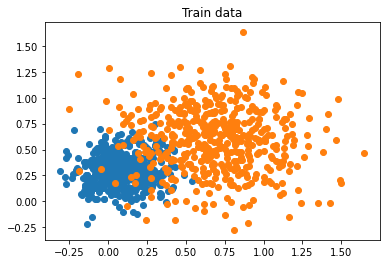

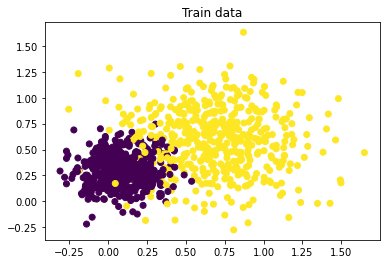

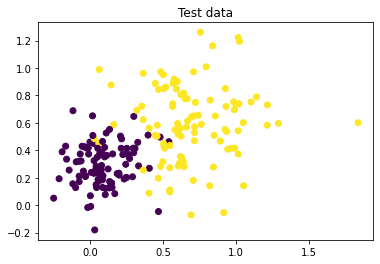

In [ ]:
np.random.seed(15)

x1_center = np.array([0.1, 0.3])
x1 =  x1_center + 0.15 * np.random.randn(500, 2)

x2_center = np.array([0.7, 0.6])
x2 =  x2_center + 0.3 * np.random.randn(500, 2)

# ak sú dáta rozdelené zobrazujú sa jednoducho
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.title("Train data")
plt.show()

# dáta ešte upravíme, aby nám ostal vektor x s dátami a y s anotáciami
y = np.ones(1000)
y[500:] = 2
x = np.concatenate([x1, x2], axis=0)

# dáta si ešte premiešame
pindxs = np.random.permutation(1000)
x = x[pindxs]
y = y[pindxs]

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Train data")
plt.show()

# vygenerujeme si aj testovacie data
x1_test = x1_center + 0.15 * np.random.randn(100, 2)
x2_test =  x2_center + 0.3 * np.random.randn(100, 2)
y_test = np.ones(200)
y_test[100:] = 2
x_test = np.concatenate([x1_test, x2_test], axis=0)
pindxs = np.random.permutation(200)
x_test = x_test[pindxs]
y_test = y_test[pindxs]

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Test data")
plt.show()

In [ ]:
def knn(x, k, x_train, y_train):
  ...

Kód si otestujeme:

Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 1.0 - GT class: 2.0
Predicted class: 2.0 - GT class: 2.0


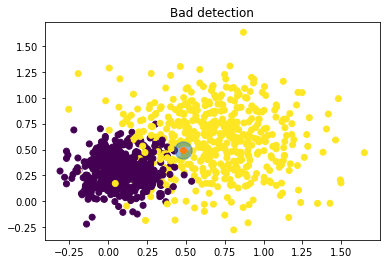

Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 2.0 - GT class: 2.0


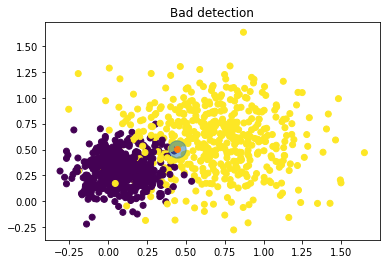

In [ ]:
for i in range(10):
  y_pred = knn(x_test[i], 3, x, y)
  print("Predicted class: {} - GT class: {}".format(y_pred, y_test[i]))

# Na 4. (index 3) prvku testovacej množiny by to nemalo fungovať. Môžeme si ho zobraziť.

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x_test[3, 0], x_test[3, 1], 300, marker='o', alpha=0.5)
plt.scatter(x_test[3, 0], x_test[3, 1], marker='o')
plt.title("Bad detection")
plt.show()


for i in range(10):
  y_pred = knn(x_test[i], 19, x, y)
  print("Predicted class: {} - GT class: {}".format(y_pred, y_test[i]))

# Na 9. (index 8) prvku testovacej množiny by to pre k=3 nefunguje, ale pre k=19 áno. Môžeme si to zobraziť.

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x_test[8, 0], x_test[8, 1], 300, marker='o', alpha=0.5)
plt.scatter(x_test[8, 0], x_test[8, 1], marker='o')
plt.title("Bad detection")
plt.show()



## 5. Úloha - Validácia

Môžeme si všimnúť, že výsledok klasifikátora na našich testovacích dátach bude záležať na zvolení parametru $k$, resp. metriky. Preto by bolo fajn nájsť postup ako vhodné $k$ určiť. Zdanlivo by sme mohli vybrať také $k$, ktoré je najlepšie na testovacích dátach. To však nie je vhodné z vedeckého hľadiska, keďže by sme chceli testovacie dáta použiť čisto na overenie presnosti. Ak by sme na nich aj zvolili $k$, tak by mohlo dojsť, k tzv. preučeniu, čo by nám skreslilo výsledky nahor. Preto budeme určovať parameter $k$ pomocou tzv. validačnej množiny, ktorú si vyčleníme z trénovacej a budeme ju používať výlučne len na overovanie presnosti pre jednotlivé hodnoty $k$ a jej prvky už nebudú vystupovať ako vstupy do funkcie knn.

Ako úlohu si teda napíšte kód, ktorým si vyčleníte validačnú množinu (cca 20 percent z trénovacej) a nájdite na nej najvhodnejší parameter $k$. Na koniec vypíšte výslednú presnosť pre zvolené $k$ na trénovacej množine.

Kto to bude mať hotove skôr môže implementovať aj tzv. krížovú validáciu (cross-validation) podľa popisu na [wikipédii](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).



In [ ]:
...

[0.905, 0.9316666666666666, 0.9383333333333334, 0.9366666666666666, 0.9283333333333333, 0.9333333333333333, 0.935, 0.9383333333333334, 0.9383333333333334, 0.94]


## 6. Úloha - Mnist

V rámci tretej úlohy si načítame známy dataset MNIST a otestujeme na ňom kNN klasifikátor. Tento dataset obsahuje obrázky čísel a k nim samozrejme anotácie.

Ako úlohu si dáta rozdeľte na 50 000 trenovácich, 10 000 validačných a 10 000 testovacích dát a skúste nájsť najvhodnejšie k a vyhodnoťte presnosť takéhoto klasifikátora na testovacích dátach.

*Pozn.:* Načítanie datasetu môže chvíľu trvať. Komu sa nechce môže preskočiť a urobiť najprv úlohu č. 4 a potom sa vrátiť k tejto. 

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float32')/255
y = mnist.target.astype('int64')

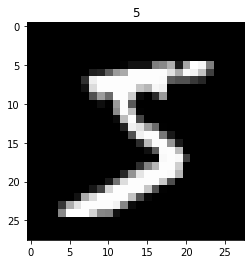

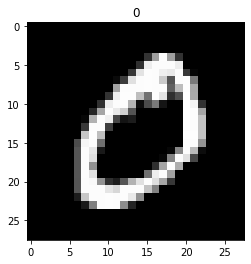

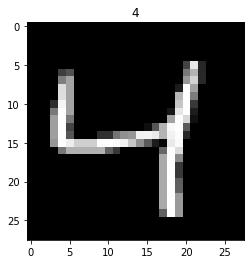

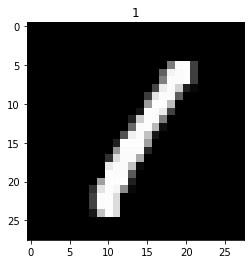

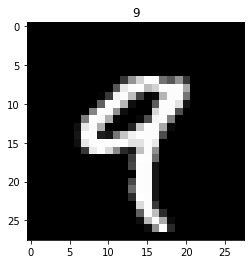

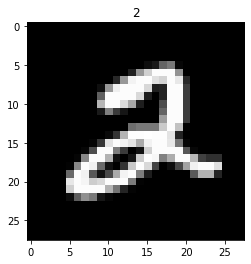

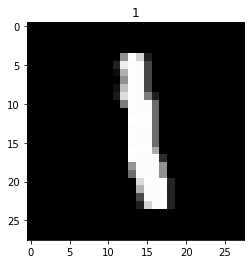

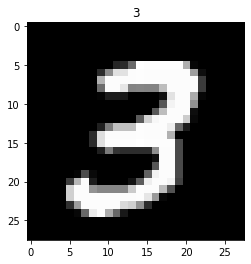

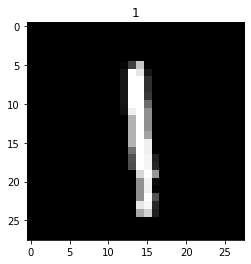

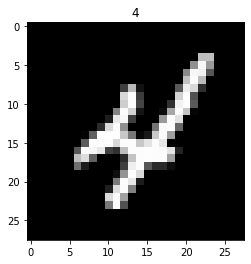

In [ ]:
for i in range(10):
  plt.imshow(np.reshape(X[i,],(28,28)), cmap='gray')
  plt.title(y[i])
  plt.show()

## 7. Úloha - Zobrazenie susedov

V rámci tejto úlohy napíšte funkciu knn_visualized, ktorá bude mať rovnakú signatúru ako knn, ale taktiež vykreslí obrázky susedov. Môžete predpokladať že bude použitá len na dáta z MNISTu, takže každý vektor môžete premeniť na $28 \times 28$ šedotónový obrázok.

Ako bonus môžete obrázky tých susedov, ktorých trieda bola najviac zastúpená vyfarbiť inou farbou.


In [ ]:
def knn_visualized(x, k, x_train, y_train):
  ...

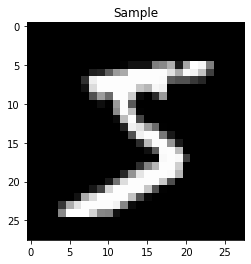

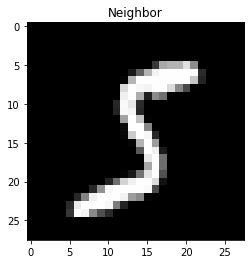

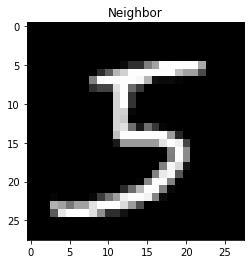

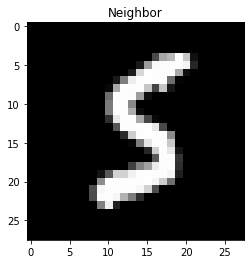

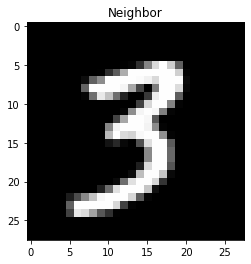

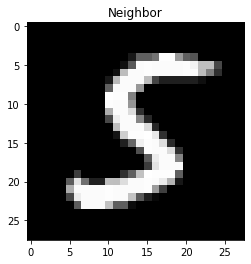

5

In [ ]:
knn_visualized(X[0], 5, X[1:], y[1:])